# Polynomial Regression Example

In [1]:
# import sys
# sys.path.append('../../pyLearnAlgorithms')
import pandas as pd
import numpy as np
import os
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.polynomial_regression import PolynomialRegression
from pyLearnAlgorithms.split_data import SplitData

In [2]:
dr = '../datasets'
fl = 'HealthInsurance.csv'
csv_path = os.path.join(dr, fl)
data = pd.read_csv(csv_path)

In [3]:
split = SplitData(data)
data_train, data_test = split.split_train_test(0.2)
print(data_train.size)
print(data_test.size)

16
4


In [4]:
data_train = np.array(data_train)
data_test = np.array(data_test)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]

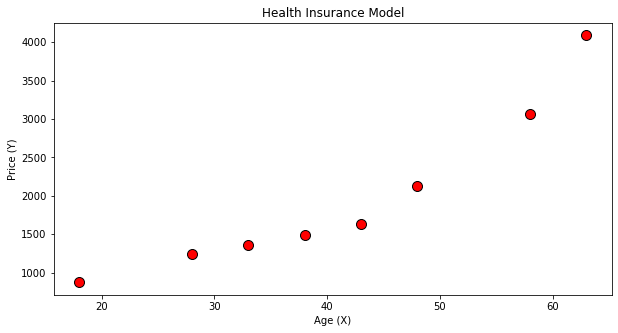

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data(xlabel = 'Age (X)', ylabel = 'Price (Y)', 
                        title = 'Health Insurance Model')

In [6]:
regressor = PolynomialRegression(X, y)
X_poly = regressor.poly_features(X, poly_degree = 2)
X_poly, mu, sigma = regressor.feature_normalize(X_poly)

In [7]:
Xtest = regressor.prepare_extracts(Xtest, ytest, mu, sigma, poly_degree = 2)

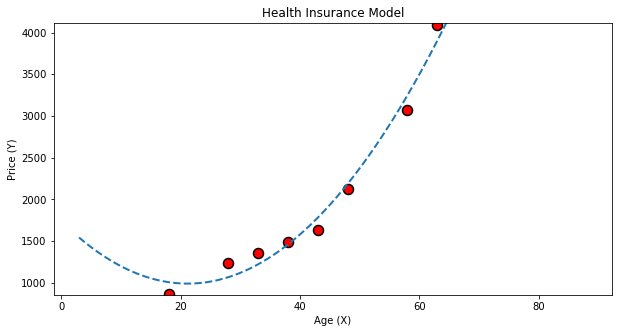

In [8]:
dataset_graph = GraphView(X, y)
dataset_graph.model_poly(xlabel = 'Age (X)', ylabel = 'Price (Y)', 
                         title = 'Health Insurance Model',
                         Xpoly = X_poly, y = y, poly_degree = 2, mu = mu, sigma = sigma,
                         lambda_ = 0, 
                         maxiter = 200)

In [9]:
train_error, val_error = regressor.learning_curve(X_poly, y, Xtest, ytest, lambda_ = 0)
print('Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

Training Examples	Training Error		Cross Validation Error
1			0.0	2757346.908220576
2			2.120509153556282e-09	664980.471212499
3			2.715640489183171e-07	20232.21498349848
4			7609.169580582328	32015.373386008185
5			11886.44681818194	19666.387202446967
6			9954.02379861156	20224.602726465295
7			9428.90169429261	20891.086663290163
8			9995.210763437057	17042.268724196612


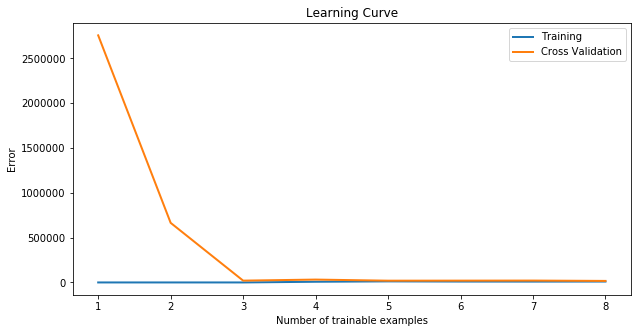

In [10]:
dataset_graph.learning_curve(train_error, val_error)

In [11]:
error_train, error_val = regressor.validation_curve(X_poly,y,Xtest,ytest, 
                                                   lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			0.0	2757346.908220576
2			2.120509153556282e-09	664980.471212499
3			2.715640489183171e-07	20232.21498349848
4			7609.169580582328	32015.373386008185
5			11886.44681818194	19666.387202446967
6			9954.02379861156	20224.602726465295
7			9428.90169429261	20891.086663290163
8			9995.210763437057	17042.268724196612


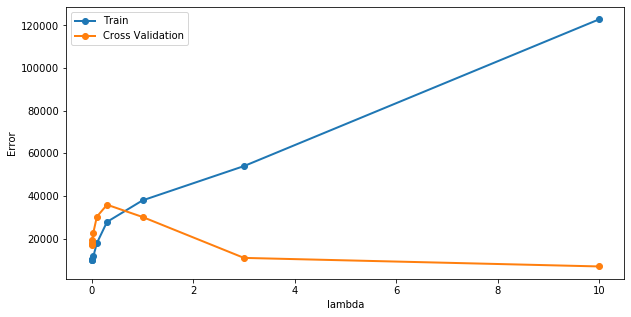

In [12]:
dataset_graph.validation_curve_poly(X_poly, y, Xtest, ytest,
                                    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])

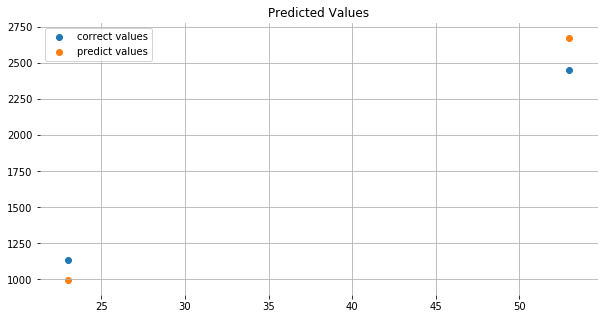

In [13]:
pred = regressor.predict(Xtest, X_poly, y, lambda_ = 0) 
dataset_graph.predicted_values(data_test[:, 0], ytest, pred)

In [14]:
optimize = regressor.train_poly_reg(X_poly, y, 1 , 200)

In [15]:
optimize.x

array([1985.125     ,  342.27007564,  627.96412266])